In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xbbg import blp
from IPython.core.display import display, HTML
import mplfinance as mpf 
import multitasking
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import xlwings as xlw
import datetime as dt
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
stoncks = pd.read_excel('Stonks.xlsx')

In [3]:
stoncks = pd.read_excel('Stonks.xlsx')
stoncks = stoncks[123] + ' RX Equity'
stoncks =stoncks.drop([6,16,26,28,29,30,32,33,36,37,39,41,42,44,46,47,49,50])
stoncks = stoncks.iloc[0:34]

df = pd.DataFrame()

for i in stoncks:
    try:
        data = blp.bdh(
            tickers=i, flds=['Open', 'High', 'Low', 'last_price'],
            start_date='2020', Per='D', Fill='P', Days='A',
        )
        name = data.columns[0][0]
        data = data[data.columns[0][0]].rename({'last_price':'Close'}, axis=1)
        data.index = data.index.rename('timestamp')
        data[name] = data['Close']
        df[name] = data[name]
    except:
        pass

In [196]:
day = blp.bdib(('BANE RX Equity'), dt='20210429', session='day')
day = day[day.columns[0][0]]
day.index = [day.index[j].tz_localize(None) for j in range(day.shape[0]) ] 

In [201]:
cur_dt

datetime.date(2021, 4, 30)

In [242]:
data1 = pd.DataFrame()
data2 = pd.DataFrame()

cur_dt = pd.Timestamp('today', tz='America/New_York').date()
recent = pd.bdate_range(end=cur_dt, periods=2, tz='America/New_York')
pre_dt = max(filter(lambda dd: dd < cur_dt, recent))

for i in range(30, 1, -1):
    try:
        df = blp.bdib('CO1 Comdty', dt=pre_dt-dt.timedelta(days=i))

        if df.shape[0] == 0:
            continue

        df.index = [df.index[j].tz_localize(None) for j in range(df.shape[0]) ] 
        df = df[df.columns[0][0]]

        data1 = data1.append(df)
    except:
        pass
    
for i in range(30, 1, -1):
    try:
        df = blp.bdib('VEM1 Index', dt=pre_dt-dt.timedelta(days=i))

        if df.shape[0] == 0:
            continue

        df.index = [df.index[j].tz_localize(None) for j in range(df.shape[0]) ] 
        df = df[df.columns[0][0]]

        data2 = data2.append(df)
    except:
        pass

In [243]:
data1

,open,high,low,close,volume,num_trds,value
2021-03-30 01:01:00,65.37,65.41,65.36,65.41,65,32,4250.38
2021-03-30 01:02:00,65.32,65.34,65.27,65.34,11,11,718.49
2021-03-30 01:03:00,65.26,65.26,65.26,65.26,1,1,65.26
2021-03-30 01:04:00,65.26,65.29,65.26,65.29,4,4,261.09
2021-03-30 01:05:00,65.28,65.38,65.28,65.38,9,9,587.82
...,...,...,...,...,...,...,...
2021-04-27 22:06:00,66.56,66.56,66.56,66.56,5,4,332.80
2021-04-27 22:10:00,66.55,66.55,66.55,66.55,1,1,66.55
2021-04-27 22:17:00,66.55,66.55,66.55,66.55,1,1,66.55
2021-04-27 22:42:00,66.56,66.56,66.56,66.56,3,3,199.68


In [229]:
data1 = data1.groupby(pd.Grouper(freq='60min')).mean().dropna()
data2 = data2.groupby(pd.Grouper(freq='60min')).mean().dropna()

In [239]:
data1.index = [data1.index[i] + dt.timedelta(hours = 2) for i in range(data1.shape[0])]
#data2.index = [data2.index[i] + dt.timedelta(hours = 2) for i in range(data.shape[0])]

In [241]:
data2.loc[dt.datetime(2021, 4, 22, 0, 0, 0) ::].head(30)

,open,high,low,close,volume,num_trds,value
2021-04-22 10:00:00,144438.500000,144494.333333,144371.000000,144422.833333,997.983333,490.266667,1.441541e+08
2021-04-22 11:00:00,144206.333333,144255.000000,144155.500000,144209.333333,679.800000,359.333333,9.803053e+07
2021-04-22 12:00:00,144394.333333,144438.166667,144354.500000,144401.500000,575.000000,295.866667,8.303635e+07
2021-04-22 13:00:00,144555.000000,144585.333333,144519.333333,144551.333333,320.000000,172.950000,4.625202e+07
2021-04-22 14:00:00,146281.250000,146416.250000,146198.750000,146323.571429,2558.196429,1142.839286,3.744890e+08
2021-04-22 15:00:00,146955.333333,147017.666667,146895.333333,146954.500000,1086.200000,519.650000,1.597476e+08
2021-04-22 16:00:00,146867.833333,146927.166667,146801.333333,146861.333333,1114.783333,531.983333,1.635893e+08
2021-04-22 17:00:00,146986.666667,147049.000000,146937.666667,146997.500000,930.150000,464.533333,1.368487e+08
2021-04-22 18:00:00,147522.608696,147575.000000,147484.565217,147528.913043,979.217391,454.891304,1.444710e+08
2021-04-23 10:00:00,148093.833333,148157.000000,148024.000000,148087.833333,1017.966667,500.283333,1.507937e+08


In [221]:
data2

,open,high,low,close,volume,num_trds,value
2021-03-30 10:00:00,145230.0,145390.0,145080.0,145250.0,2072,1236,300909728.0
2021-03-30 10:01:00,145260.0,145320.0,145070.0,145120.0,1615,862,234447936.0
2021-03-30 10:02:00,145110.0,145350.0,145100.0,145350.0,1309,686,190110160.0
2021-03-30 10:03:00,145340.0,145390.0,145260.0,145340.0,1308,676,190082848.0
2021-03-30 10:04:00,145340.0,145430.0,145290.0,145430.0,1367,623,198716352.0
...,...,...,...,...,...,...,...
2021-04-27 18:41:00,148810.0,148880.0,148800.0,148870.0,1026,464,152716880.0
2021-04-27 18:42:00,148870.0,148880.0,148830.0,148880.0,591,266,87971912.0
2021-04-27 18:43:00,148880.0,148940.0,148850.0,148850.0,1163,512,173170928.0
2021-04-27 18:44:00,148840.0,148890.0,148800.0,148850.0,731,286,108804560.0


In [57]:
df = pd.DataFrame()

for i in ['BANE RX Equity', 'BANEP RX Equity', 'GAZP RX Equity', 'SIBN RX Equity', 'LKOH RX Equity', 'NVTK RX Equity', 'ROSN RX Equity', 'TATN RX Equity', 'TATNP RX Equity', 'TRNFP RX Equity']:
    data = blp.bdh(
        tickers=i, flds=['Open', 'High', 'Low', 'last_price'],
        start_date='2020', Per='D', Fill='P', Days='A',
    )
    name = data.columns[0][0]
    data = data[data.columns[0][0]].rename({'last_price':'Close'}, axis=1)
    data.index = data.index.rename('timestamp')
    data[name] = data['Close']
    df[name] = data[name]

In [75]:
returns = ((df.shift(-1).iloc[0:-1] - df.iloc[1::])/df.shift(-1).iloc[0:-1]*100).dropna()
returns['day'] = returns.index.dayofweek
returns = returns[(returns['day'] != 4) & (returns['day'] != 5)]

In [110]:
spreads = pd.DataFrame()
for i in returns.columns[0:-2]:
    for j in returns.columns[0:-2]:
        if i == j:
            continue
            
        spreads[i + '-' + j] = returns[i] - returns[j]

In [191]:
max_r = 0
col = 0
for i in spreads.columns:
    X = sm.add_constant( returns['CO1 Comdty'].iloc[20:50] )
    model = sm.OLS(spreads[i].iloc[20:50], X)
    results = model.fit()
    y_predict = results.params[0] + results.params[1]*returns['CO1 Comdty'].iloc[20:50]
    if results.rsquared > max_r:
        max_r = results.rsquared
        col = i
    print(results.summary())


                                  OLS Regression Results                                  
Dep. Variable:     BANE RX Equity-BANEP RX Equity   R-squared:                       0.008
Model:                                        OLS   Adj. R-squared:                 -0.027
Method:                             Least Squares   F-statistic:                    0.2265
Date:                            Fri, 30 Apr 2021   Prob (F-statistic):              0.638
Time:                                    17:37:56   Log-Likelihood:                -35.266
No. Observations:                              30   AIC:                             74.53
Df Residuals:                                  28   BIC:                             77.33
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

                                  OLS Regression Results                                  
Dep. Variable:     GAZP RX Equity-BANEP RX Equity   R-squared:                       0.036
Model:                                        OLS   Adj. R-squared:                  0.001
Method:                             Least Squares   F-statistic:                     1.038
Date:                            Fri, 30 Apr 2021   Prob (F-statistic):              0.317
Time:                                    17:37:56   Log-Likelihood:                -67.244
No. Observations:                              30   AIC:                             138.5
Df Residuals:                                  28   BIC:                             141.3
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

                                  OLS Regression Results                                 
Dep. Variable:     LKOH RX Equity-BANE RX Equity   R-squared:                       0.060
Model:                                       OLS   Adj. R-squared:                  0.026
Method:                            Least Squares   F-statistic:                     1.772
Date:                           Fri, 30 Apr 2021   Prob (F-statistic):              0.194
Time:                                   17:37:56   Log-Likelihood:                -84.070
No. Observations:                             30   AIC:                             172.1
Df Residuals:                                 28   BIC:                             174.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

                                  OLS Regression Results                                 
Dep. Variable:     ROSN RX Equity-GAZP RX Equity   R-squared:                       0.008
Model:                                       OLS   Adj. R-squared:                 -0.027
Method:                            Least Squares   F-statistic:                    0.2264
Date:                           Fri, 30 Apr 2021   Prob (F-statistic):              0.638
Time:                                   17:37:56   Log-Likelihood:                -72.903
No. Observations:                             30   AIC:                             149.8
Df Residuals:                                 28   BIC:                             152.6
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

                                  OLS Regression Results                                  
Dep. Variable:     TATNP RX Equity-LKOH RX Equity   R-squared:                       0.022
Model:                                        OLS   Adj. R-squared:                 -0.013
Method:                             Least Squares   F-statistic:                    0.6343
Date:                            Fri, 30 Apr 2021   Prob (F-statistic):              0.432
Time:                                    17:37:57   Log-Likelihood:                -66.309
No. Observations:                              30   AIC:                             136.6
Df Residuals:                                  28   BIC:                             139.4
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [194]:
max_r

0.07993823013270984

In [183]:
qqq = pd.DataFrame()
qqq['predict'] = y_predict
qqq['t-t'] = spreads[col]

In [184]:
qqq = qqq.iloc[20:70]

<AxesSubplot:xlabel='timestamp'>

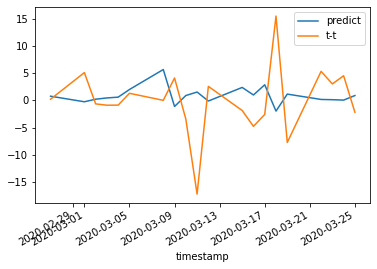

In [185]:
qqq.iloc[20:40].plot()